# Análise da Curva Característica do Resistor

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_theme()

# Curva característica do resistor

In [ ]:
df = pd.read_csv('resistor.csv')

In [ ]:
df['sCorrente']   = df['Corrente'] * 0 + 0.0005
df['sRX']         = df['RX'] * 0 + 0.005

In [ ]:
popt, pcov = curve_fit(
    lambda a, x, b: a * x + b,
    xdata=df['Corrente'],
    ydata=df['RX'],
    sigma=df['sRX'],
    p0=[100, 0]
)

In [ ]:
for i in range(popt.shape[0]):
  print('[{}]:\t{:.5f}\t{:.5f}'.format(i, popt[i], np.sqrt(pcov[i][i])))

[0]:	98.97247	0.10421
[1]:	-0.01103	0.00219


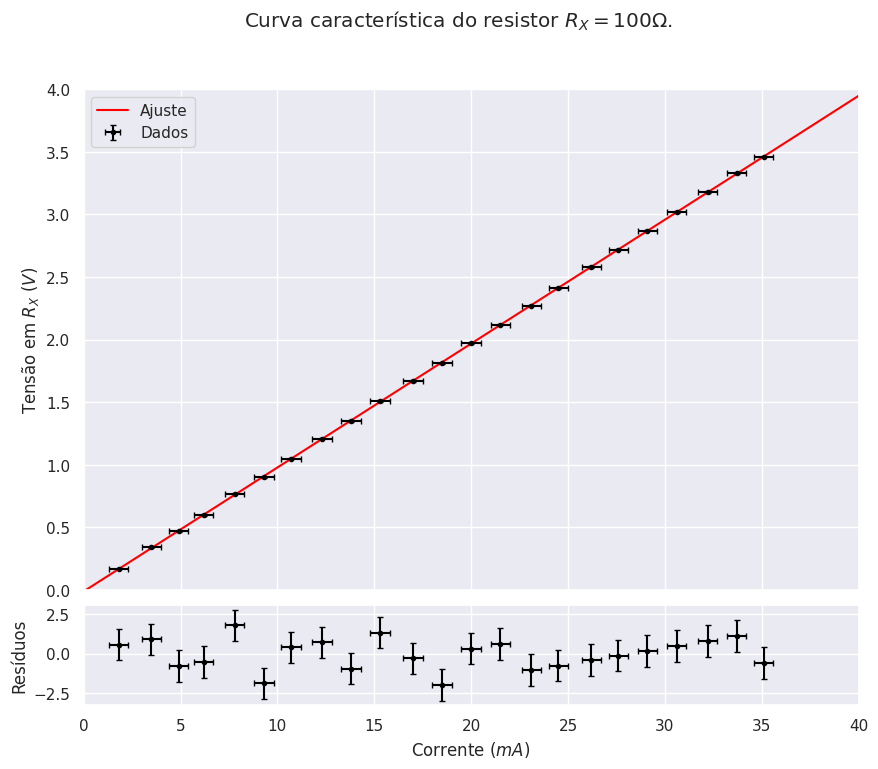

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={ 'hspace': 0.05, 'height_ratios': (5,1) })
plt.suptitle('Curva característica do resistor $R_X = 100 \\Omega$.')

x = np.linspace(0, 40E-3, 2)
sns.lineplot(x=x*1E3, y=popt[0] * x + popt[1], color='red', label='Ajuste', ax=axs[0])

axs[0].errorbar(
    x=df['Corrente']*1E3,
    y=df['RX'],
    xerr=df['sCorrente']*1E3,
    yerr=df['sRX'],
   fmt='.', color='black', capsize=2, capthick=1, label='Dados'
)

axs[1].errorbar(
    x=df['Corrente']*1E3,
    y=(df['RX'] - popt[0]*df['Corrente'] - popt[1]) / df['sRX'],
    xerr=df['sCorrente']*1E3,
    yerr=1,
    fmt='.', color='black', capsize=2, capthick=1, label='Dados'
)

axs[0].set_ylabel('Tensão em $R_X$ ($V$)')
axs[1].set_xlabel('Corrente ($mA$)')
axs[1].set_ylabel('Resíduos')
axs[0].set_xlim(0, 40)
axs[0].set_ylim(0, 4)
axs[0].legend()
plt.show()

In [ ]:
np.sum( ( df['RX'] - df['Corrente']*popt[0] - popt[1] )**2 / (df['sRX'])**2 ) / (df.shape[0] - 2)

1.0150499995277262

In [1]:
21*1.01

21.21

# Curva característica da pilha

In [ ]:
df = pd.read_csv('pilha.csv')

In [ ]:
df['sPilha']    = df['Pilha'] * 0 + 0.005
df['sCorrente'] = df['Corrente'] * 0 + 0.005

In [ ]:
popt, pcov = curve_fit(
    lambda x, a, b: a * x + b,
    xdata=df['Corrente'],
    ydata=df['Pilha'],
    sigma=df['sPilha']
)

In [ ]:
popt

array([-1.38310639,  1.23596641])

In [ ]:
np.sqrt(pcov)

<ipython-input-15-df996c568848>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(pcov)


array([[0.00581522,        nan],
       [       nan, 0.00054627]])

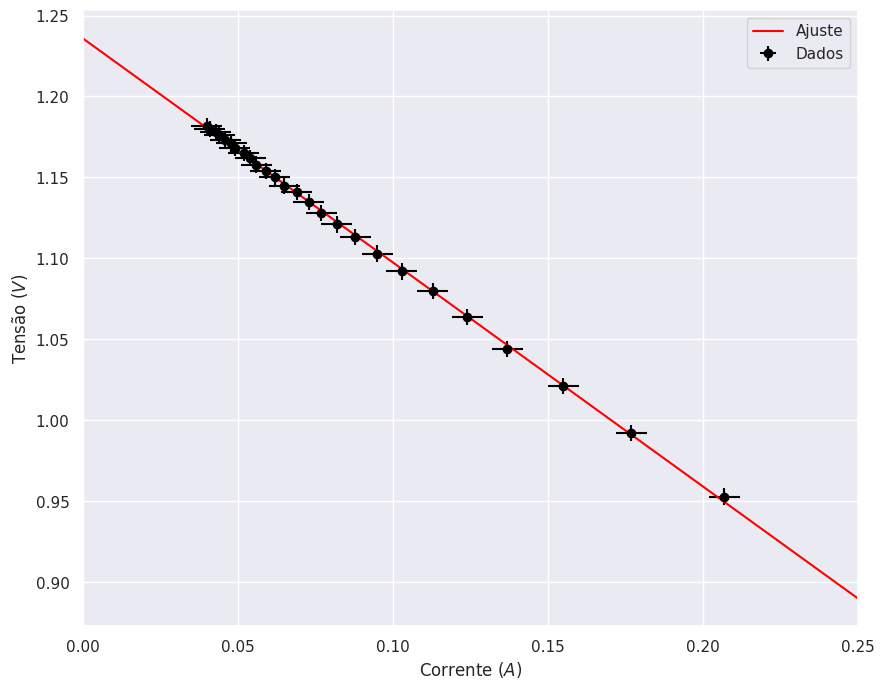

In [ ]:
plt.errorbar(
    x=df['Corrente'],
    y=df['Pilha'],
    xerr=df['sCorrente'],
    yerr=df['sPilha'],
    fmt='o', color='black', label='Dados'
)

x = np.linspace(0, 0.25, 2)
sns.lineplot(x=x, y=popt[0] * x + popt[1], color='red', label='Ajuste')

plt.xlabel('Corrente ($A$)')
plt.ylabel('Tensão ($V$)')
plt.xlim(0, 0.25)
plt.show()

In [ ]:
np.sum( ( df['Pilha'] - df['Corrente'] * popt[0] - popt[1] )**2 / (df['sPilha'])**2 ) / (df.shape[0] - 2)

0.06783766448734747